# Infrastructure Sub-metric(the number of park facilities)
- **Dataset:** City_facilitis_of_Pittsburgh
- **Data path:** `data/City_Facilities_of_Pittsburgh.csv`
- **Contributor:** Boyi Sun

## Work Completed (Check-in)
- Loaded the city facilities data of Pittsburgh using pandas
- Analyzed the primary users of city facility 
- Counted the facility number and the citipark number by neighborhood respectively
- Visualization :
    - Primary_user of facilities
    - Top 20 neighborhoods by the number of facilities
    - Top 20 neighborhoods by the number of park facilities

## Future Work
- Add a reasonable weight on different type of citypark facilities. For example, give a lager weight to the citypark facilities in the type "senior", making it more reasonable for our overall metric: Best neighborhood for **retirees**"
- Take other relavent data into considertaion.
- Exclude the data point that may be not suitable for analysis on retirees, such as the facilities in the playgound for the children.

## Key Findings
- The top three primary users in the dataset is `Department of Public Work`, `Citiparks`, and `Department of Public Safety`.
- The number of facilities is varied from neighborhood to neighborhood.
- The number of park facilities is not much different. Adding a weight on different types may make the analysis more strict to retirees.

In [2]:
#Import package and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_path="../data/City_Facilities_of_Pittsburgh.csv"
df_facility=pd.read_csv(data_path)

In [3]:
# Data loading 
print("First 20 rows of data")
print(df_facility.head(20))

First 20 rows of data
    _id          id  parcel_id inactive  \
0     1   650726265  120-J-300        f   
1     2   783044037    2-H-284        f   
2     3  1997158435   23-R-157        f   
3     4   204824684   10-F-198        f   
4     5   472140955  013-K-314        f   
5     6   984285720   13-F-217        f   
6     7  2110346447   13-K-314        f   
7     8   263802473    3-M-404        f   
8     9   271629667    49-K-61        f   
9    10   436558867        NaN        f   
10   11  1534014655   122-L-50        f   
11   12   287640271   122-L-50        f   
12   13   970468255    36-L-81        f   
13   14  2105474885   17-R-120        f   
14   15  1042325852   17-R-120        f   
15   16   635191366   17-R-120        f   
16   17   940841117   17-R-120        f   
17   18  1890556433    35-G-26        f   
18   19   160770425    26-D-11        f   
19   20   836558540    26-D-11        f   

                                                 name rentable        type

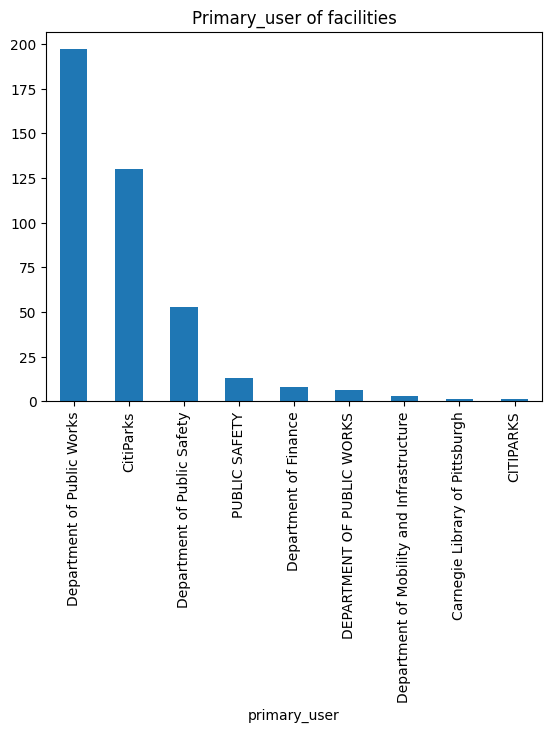

In [4]:
# Analysis of facilities primary users
primary_users_counts=df_facility["primary_user"].value_counts()
primary_users_counts.plot(kind='bar',title="Primary_user of facilities")
plt.show()

neighborhood
Highland Park                30
Squirrel Hill South          29
Perry North                  20
Brookline                    19
Strip District               15
Hazelwood                    14
Brighton Heights             14
Carrick                      12
Lincoln-Lemington-Belmar     11
South Side Slopes            11
Elliott                      11
Morningside                  10
Shadyside                     9
Point Breeze                  8
Central Business District     8
Squirrel Hill North           7
Mount Washington              7
Sheraden                      7
Lower Lawrenceville           7
Banksville                    7
Name: Facility_counts, dtype: int64


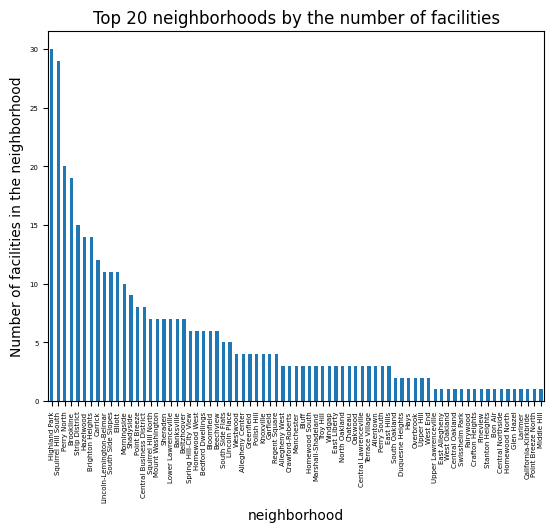

In [5]:
# All facilities counts
neighborhood_facility_counts=df_facility["neighborhood"].value_counts()
neighborhood_facility_counts.rename("Facility_counts",inplace=True)
print(neighborhood_facility_counts.head(20))

# Visualization
neighborhood_facility_counts.plot(kind="bar",title="Top 20 neighborhoods by the number of facilities",ylabel="Number of facilities in the neighborhood",fontsize=5)
plt.show()

neighborhood
South Side Slopes           6
Squirrel Hill South         6
Lincoln-Lemington-Belmar    5
Point Breeze                5
Morningside                 5
Brighton Heights            4
Beechview                   4
Elliott                     4
South Side Flats            4
Brookline                   4
Polish Hill                 4
Sheraden                    4
Beltzhoover                 4
Mount Washington            4
Squirrel Hill North         4
Allegheny Center            4
Hazelwood                   3
Shadyside                   3
Bloomfield                  3
Highland Park               3
Name: Park_facilities_counts, dtype: int64


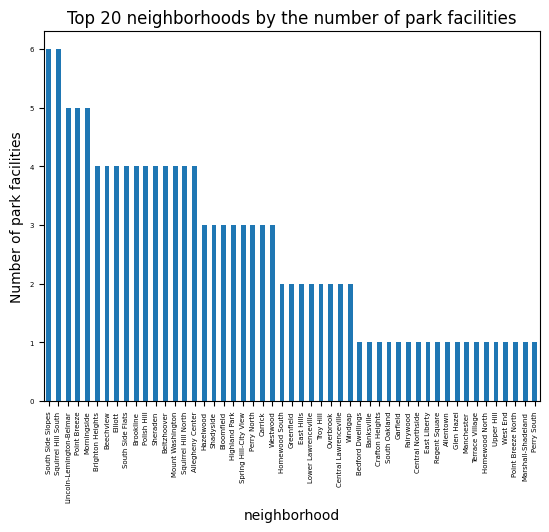

In [6]:
# Park facilities counts
park_facility=df_facility[df_facility["primary_user"]=="CitiParks"]
neighborhood_park_facility_counts=park_facility["neighborhood"].value_counts()
neighborhood_park_facility_counts.rename("Park_facilities_counts",inplace=True)
print(neighborhood_park_facility_counts.head(20))

# Visualization
neighborhood_park_facility_counts.plot(kind="bar",title="Top 20 neighborhoods by the number of park facilities",fontsize=5,ylabel="Number of park facilities")
plt.show()

type
Shelter          62
Dugout           42
Concession       32
Firehouse        28
Service          27
Pool             26
Storage          24
Office           23
Utility          20
Restrooms        18
Activity         18
Senior           16
Medic Station    11
Police            8
Salt Dome         8
POLICE            7
Rec Center        6
Pool/Rec          6
STORAGE           6
Pool Closed       4
Cabin             4
SERVICE           3
Community         3
Recycling         3
TRAINING          2
Training          2
OFFICE            2
Vacant            1
Name: count, dtype: int64


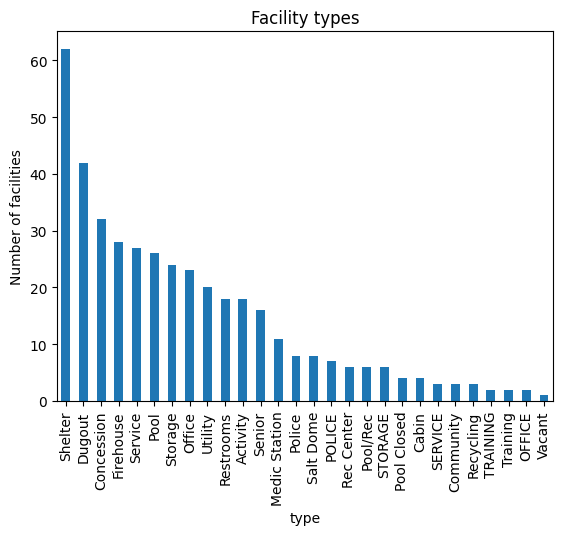

<Figure size 1000x500 with 0 Axes>

In [8]:
type_count=df_facility["type"].value_counts()
print(type_count)
type_count.plot(kind="bar",title="Facility types",ylabel="Number of facilities")
plt.figure(figsize=(10,5))
plt.show()


In order to make analysis more reasonable, we select some types of facility into consideraion and dismiss other irrelevant types of facilites for retirees. 


Among the facility we take into consideration, we then calssify into three groups as follows:


After that, apply the Analytic Hierarchy Process (AHP)  to 

In [ ]:
group_definitions = {
        'Safety_Health': ['Police', 'Medic Station'],
        'Recreation_Activity': ['Pool', 'Pool/Rec', 'Rec Center', 'Activity'],
        'Community_Amenities': ['Senior', 'Community', 'Restrooms', 'Shelter', 'Utility']
    }
friendly_types_list = [item for sublist in group_definitions.values() for item in sublist]
df_facility['type_cleaned'] = df_facility['type'].str.title()
# 筛选，只保留我们关心的11种设施
df_filtered = df_facility[df_facility['type_cleaned'].isin(friendly_types_list)].copy()
    
    # 清理 'neighborhood' 列中的空值
df_filtered = df_filtered.dropna(subset=['neighborhood'])

if df_filtered.empty:
    print("错误: 未找到匹配所选设施类型的数据。")


In [12]:
# Build characteristic matrix
crosstab_matrix = pd.crosstab(df_filtered['neighborhood'], df_filtered['type_cleaned']) 

for col_name in friendly_types_list:
        if col_name not in crosstab_matrix.columns:
            crosstab_matrix[col_name] = 0
    
    # 其次，根据组别定义，将设施计数加总，创建最终的特征矩阵
feature_matrix_grouped = pd.DataFrame(index=crosstab_matrix.index)
for group_name, types_in_group in group_definitions.items():
        # 将组内所有设施的数量相加
        feature_matrix_grouped[group_name] = crosstab_matrix[types_in_group].sum(axis=1)
        
print("\n--- 3个组别的设施统计 (前5行) ---")
print(feature_matrix_grouped.head(5))


--- 3个组别的设施统计 (前5行) ---
                   Safety_Health  Recreation_Activity  Community_Amenities
neighborhood                                                              
Allegheny Center               0                    2                    2
Allegheny West                 1                    0                    0
Allentown                      2                    1                    0
Banksville                     0                    1                    1
Bedford Dwellings              0                    1                    0


In [ ]:
# AHP weight calculation
judgment_matrix = np.array([
        [1.0, 3.0, 3.0],      # C1 (Safety)
        [1/3.0, 1.0, 1.0],  # C2 (Recreation)
        [1/3.0, 1.0, 1.0]       # C3 (Community)
    ])
criteria_names = list(group_definitions.keys())
n = len(criteria_names)
# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(judgment_matrix)
    
    # 获取最大特征值 (λ_max)
max_eig_val = np.max(eigenvalues.real)
    
    # 获取对应的特征向量 (即权重向量)
max_eig_vec = eigenvectors[:, np.argmax(eigenvalues.real)].real
    
    # 归一化特征向量，得到最终权重
weights = max_eig_vec / np.sum(max_eig_vec)
    
print("\n--- AHP 计算权重 ---")
for i, name in enumerate(criteria_names):
    print(f"{name}: {weights[i]:.1%}")

    # --- 5. 一致性检查 ---
RI = 0.58 # 随机指数 (n=3)
CI = (max_eig_val - n) / (n - 1)
CR = CI / RI
    
print(f"\n--- AHP 一致性检查 ---")
print(f"一致性比率 (CR): {CR:.2%}")
if CR <= 0.10:
    print("状态: 成功! 判断具有一致性。")
else:
    print("状态: 警告! 判断不一致 (CR > 10%)。")

In [17]:
# --- 6. 计算最终得分 ---
    
    # AHP 标准步骤：标准化“方案”矩阵 (这里是按列求和)
    # 这样做是为了计算每个社区在“该组别总设施数”中的贡献百分比
epsilon = 1e-9 # 避免除以0
normalized_scores = feature_matrix_grouped.div(feature_matrix_grouped.sum(axis=0) + epsilon, axis=1)
    
    # 最终得分 = 标准化得分矩阵 * 权重向量
final_scores = normalized_scores.dot(weights)
    

    
    # 按得分降序排列
scores_df_sorted = scores_df.sort_values(by='AHP_Score', ascending=False)
    
    # 将得分缩放到 0-100，使其更易读
scores_df_sorted['AHP_Score_Scaled'] = (scores_df_sorted['AHP_Score'] / scores_df_sorted['AHP_Score'].max()) * 100
    
print("\n--- 分析完成 ---")
print("\n--- 排名前10的社区 ---")
print(scores_df_sorted[['AHP_Score_Scaled']].head(10).to_string(formatters={'AHP_Score_Scaled': '{:,.2f}'.format}))


--- 分析完成 ---
完整排名已保存到: neighborhood_retirement_scores_ahp_consistent.csv

--- 排名前10的社区 ---
                          AHP_Score_Scaled
neighborhood                              
Lincoln-Lemington-Belmar            100.00
Allentown                            47.58
Highland Park                        47.34
Central Business District            45.83
Squirrel Hill South                  34.69
Squirrel Hill North                  30.09
Shadyside                            30.09
Garfield                             26.99
Bloomfield                           26.99
Perry South                          26.99
